In [392]:
# imports
import math
import cv2
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

## Load img & Color correction

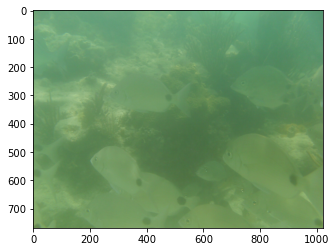

In [393]:
pic_name = '2.png'
im = np.array(cv2.cvtColor(cv2.imread(pic_name), cv2.COLOR_BGR2RGB).astype('double') / 255.0)
plt.imshow(im)
plt.show()

mu: 2.3
0.0 255.0
0.0 255.0
0.0 255.0


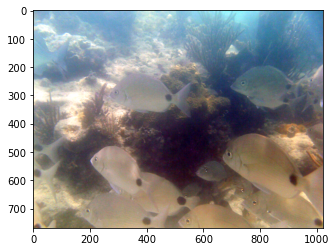

In [394]:
mu = 2.3
H,W,garbage = np.shape(im)

im_c = im*255
# for i in range(3):
#     var = np.sum((im_c[:,:,i]-np.mean(im_c[:,:,i]))**2)/(H*W)
#     var = np.sqrt(var)
#     print((np.max(im_c[:,:,i])-np.mean(im_c[:,:,i]))/var)
#     print((np.mean(im_c[:,:,i])-np.min(im_c[:,:,i]))/var)
#     mu = max(mu,(np.max(im_c[:,:,i])-np.mean(im_c[:,:,i]))/var)
#     mu = max(mu,(np.mean(im_c[:,:,i])-np.min(im_c[:,:,i]))/var)
#     # mx = np.mean(im_c[:,:,i])+mu*var
#     # mn = np.mean(im_c[:,:,i])-mu*var
#     # im_c[:,:,i] = (im_c[:,:,i]-mn)/(mx-mn)#*255
#     # print(np.min(im_c),np.max(im_c))
print('mu:',mu)
for i in range(3):
    var = np.sum((im_c[:,:,i]-np.mean(im_c[:,:,i]))**2)/(H*W)
    var = np.sqrt(var)
    mx = np.mean(im_c[:,:,i])+mu*var
    mn = np.mean(im_c[:,:,i])-mu*var
    x = (im_c[:,:,i]-mn)/(mx-mn)*255
    # x[x>1] = 1
    # x[x<0] = 0
    x[x>255] = 255
    x[x<0] = 0
    im_c[:,:,i] = x*1
    print(np.min(im_c),np.max(im_c))
im_c = im_c.astype(int)
plt.imshow(im_c)
plt.show()

100.0


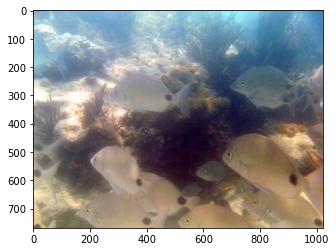

In [395]:
# print(np.max(im_c),np.min(im_c))
# print(im_c.dtype)
im_c = np.float32(im_c/255)
im_c_lab = cv2.cvtColor(im_c,cv2.COLOR_RGB2LAB)
print(np.max(im_c_lab[:,:,0]))
plt.imshow(cv2.cvtColor(im_c_lab,cv2.COLOR_LAB2RGB))
plt.show()


In [396]:
sigma = 10;
window_size = 3*sigma    
gaussian_kernel_1d = signal.gaussian(window_size, std=sigma).reshape(window_size, 1)
gaussian_kernel_2d = np.outer(gaussian_kernel_1d, gaussian_kernel_1d)
gaussian_kernel_2d /= np.sum(gaussian_kernel_2d)

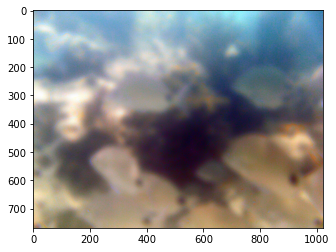

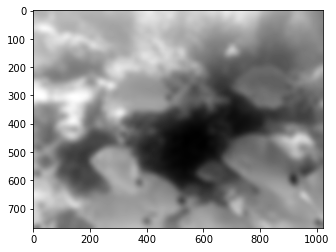

In [397]:
L = im_c_lab*1
L[:,:,0] = L[:,:,0]/100*255
I0 = np.abs(cv2.filter2D(L[:,:,0], -1, gaussian_kernel_2d))
L_ = L*1
L_[:,:,0]  = I0/255*100
L_ = cv2.cvtColor(L_,cv2.COLOR_LAB2RGB)
plt.imshow(L_)
plt.show()
plt.imshow(I0,cmap='gray')
plt.show()

## Tune Parameter

In [398]:
# Parameters
# Parameters
lamb = 10
alpha = 100
beta = 0.1
gamma = 1

In [399]:
R = np.zeros(np.shape(L[:,:,0]))
I = I0*1

6.2184453


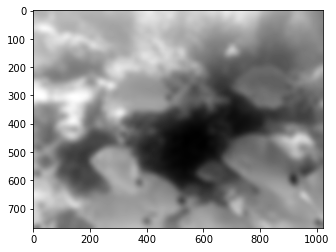

(1+0j)


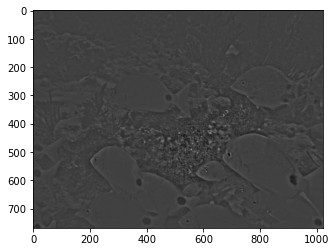

In [400]:
# calculate shrink part
diff_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
diff_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

dx = cv2.filter2D(R,-1,diff_x)
dy = cv2.filter2D(R,-1,diff_y)

max_dx = np.abs(dx)-0.5/lamb
dx = (max_dx>0).astype(float)*max_dx*((dx>=0).astype(float)-(dx<0).astype(float))

max_dy = np.abs(dy)-0.5/lamb
dy = (max_dy>0).astype(float)*max_dy*((dy>=0).astype(float)-(dy<0).astype(float))


# calculate R
# one = np.ones(np.shape(L[:,:,0]))
one = np.zeros(np.shape(L[:,:,0]))
# one[int(np.shape(one)[0]/2),int(np.shape(one)[1]/2)] = 1
one[0,0] = 1

print(np.min(I))
if np.min(I)==0:
    I+=1e-10
plt.imshow(I,cmap='gray')
plt.show()
R_1 = (1+beta*lamb)*np.fft.fft2(L[:,:,0]/I)
R_2 = np.fft.fft2(one) + beta*lamb*(np.fft.fft2(dx)*np.conjugate(np.fft.fft2(dx)) + np.fft.fft2(dy)*np.conjugate(np.fft.fft2(dy)))
print(np.min(R_2))
R_ = R_1/R_2
R = np.abs(np.fft.ifft2(R_))
# R = (R-np.min(R))/(np.max(R)-np.min(R))

# step = 5
# R = (R>np.mean(R)+np.std(R)*step)*(np.mean(R)+np.std(R)*step) + (R<np.mean(R)-np.std(R)*step)*(np.mean(R)-np.std(R)*step) + R*(R>=np.mean(R)-np.std(R)*step)*(R<=np.mean(R)+np.std(R)*step)
plt.imshow(np.abs(R),cmap='gray')
plt.show()

0.33939120173454296
[[180.07507324 180.89996338 183.14117432 ... 126.64398193 130.86181641
  133.50769043]
 [184.33959961 188.27728271 186.59637451 ... 130.81512451 133.28979492
  125.69458008]
 [176.10626221 179.85717773 178.87664795 ... 128.6517334  127.28210449
  121.97479248]
 ...
 [174.7833252  165.38269043 146.47247314 ... 149.28955078 147.74871826
  151.56188965]
 [172.23083496 158.75244141 136.86950684 ... 150.13000488 150.13000488
  151.56188965]
 [166.73675537 149.66308594 136.10687256 ... 154.2855835  150.00549316
  156.29333496]] 255.0 4.663834040597085


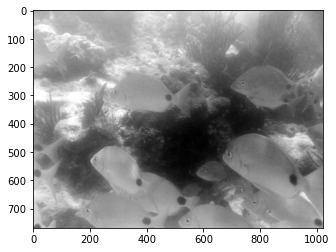

In [401]:
# calulate I
one = one*(1+gamma)
print(np.min(R))
if np.min(R)==0:
    R+=1e-20
I_1 = np.fft.fft2(gamma*I0+L[:,:,0]/R)
I_2 = np.fft.fft2(one)+alpha*(np.fft.fft2(dx)*np.conjugate(np.fft.fft2(dx))+np.fft.fft2(dy)*np.conjugate(np.fft.fft2(dy)))
I_ = I_1/I_2
I = np.real(np.fft.ifft2(I_))
I = (I>=L[:,:,0]).astype(float)*I+(I<L[:,:,0]).astype(float)*L[:,:,0]
# I = (I-np.min(I))/(np.max(I)-np.min(I))*230
print(I,np.max(I),np.min(I))
plt.imshow(I,cmap='gray')
plt.show()

684.3807 6.843806743621826 255.0


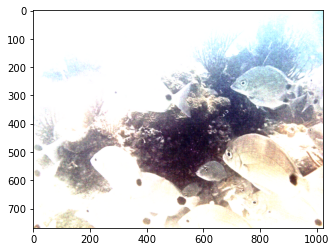

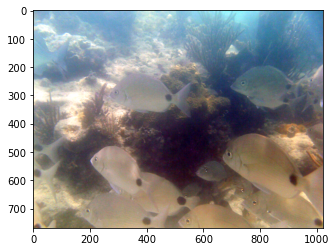

In [402]:
L_ = L*1
L_[:,:,0] = R*I/255*100
# L_[:,:,0] = R*I/255*100
print(np.max(L_[:,:,0]),np.max(R),np.max(I))
L_ = cv2.cvtColor(L_,cv2.COLOR_LAB2RGB)
plt.imshow(L_)
plt.show()
plt.imshow(im_c)
plt.show()

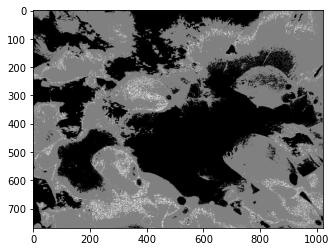

In [403]:
# remap I
decimal = 1
C = np.zeros(230*decimal+1)
for i in range(230*decimal+1):
    if i==0:
        C[i] = np.arctan(0-15)
    else:
        C[i] = C[i-1]+np.arctan(i/decimal-15)
C = C/C[230*decimal]

I_new = np.round(I*decimal)
upper_bound = np.int(np.max(np.round(I*decimal))+1)
sum = 0
for i in range(upper_bound):
    sum += np.arctan(i/decimal)*np.sum((np.round(I*decimal)==i))
# print(sum)
for i in range(upper_bound):
    c = np.arctan(i/decimal)*np.sum((np.round(I*decimal)==i))/sum
    idx = np.argmax(C>=c)
    I_new[np.round(I*decimal)==i] = idx
I_new = I_new/decimal
# print('I_new\n',I_new,'\n round(I) \n',np.round(I),'\n I \n',I,'\n I0 \n',I0)
plt.imshow(I_new,cmap='gray')
plt.show()

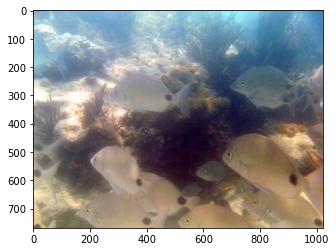

max: 255.0 33.0
min: 4.663834040597085 31.0
mean: 134.24910594922952 31.640843709309895
std: 54.0992511330044 0.5384483633948768
342.19034 6.843806743621826 255.0 0.049590997298520005


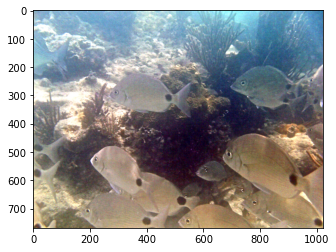

In [404]:
L_ = L*1
L_[:,:,0] = L_[:,:,0]/255*100
L_ = cv2.cvtColor(L_,cv2.COLOR_LAB2RGB)
plt.imshow(L_)
plt.show()

print('max:',np.max(I),np.max(I_new))
print('min:',np.min(I),np.min(I_new))
print('mean:',np.mean(I),np.mean(I_new))
print('std:',np.std(I),np.std(I_new))
# I = (I_new-np.mean(I_new))/np.std(I_new)*np.std(I)+np.mean(I)
# R = R/np.max(R)

L_ = L*1
L_[:,:,0] = R*I/255*100/2
print(np.max(L_[:,:,0]),np.max(R),np.max(I),np.min(R)/np.max(R))
L_ = cv2.cvtColor(L_,cv2.COLOR_LAB2RGB)
plt.imshow(L_)
plt.show()

# Second time

In [ ]:
L[:,:,0] = R*I/np.max(R)
I = np.abs(cv2.filter2D(L[:,:,0], -1, gaussian_kernel_2d))
R = np.zeros(np.shape(I))

In [ ]:
# calculate shrink part
diff_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
diff_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

dx = cv2.filter2D(R,-1,diff_x)
dy = cv2.filter2D(R,-1,diff_y)

max_dx = np.abs(dx)-0.5/lamb
dx = (max_dx>0).astype(float)*max_dx*((dx>=0).astype(float)-(dx<0).astype(float))

max_dy = np.abs(dy)-0.5/lamb
dy = (max_dy>0).astype(float)*max_dy*((dy>=0).astype(float)-(dy<0).astype(float))


In [ ]:
# calculate R
# one = np.ones(np.shape(L[:,:,0]))
one = np.zeros(np.shape(L[:,:,0]))
# one[int(np.shape(one)[0]/2),int(np.shape(one)[1]/2)] = 1
one[0,0] = 1

print(np.min(I))
if np.min(I)==0:
    I+=1e-20
plt.imshow(I,cmap='gray')
plt.show()
R_1 = (1+beta*lamb)*np.fft.fft2(L[:,:,0]/I)
R_2 = np.fft.fft2(one) + beta*lamb*(np.fft.fft2(dx)*np.conjugate(np.fft.fft2(dx)) + np.fft.fft2(dy)*np.conjugate(np.fft.fft2(dy)))
print(np.min(R_2))
R_ = R_1/R_2
R = np.real(np.fft.ifft2(R_))
# R = (R-np.min(R))/(np.max(R)-np.min(R))
# print(R)
plt.imshow(np.real(R),cmap='gray')
plt.show()

In [ ]:
# calulate I
one = one*(1+gamma)
print(np.min(R))
if np.min(R)==0:
    R+=1e-20
I_1 = np.fft.fft2(gamma*I0+L[:,:,0]/R)
I_2 = np.fft.fft2(one)+alpha*(np.fft.fft2(dx)*np.conjugate(np.fft.fft2(dx))+np.fft.fft2(dy)*np.conjugate(np.fft.fft2(dy)))
I_ = I_1/I_2
I = np.real(np.fft.ifft2(I_))
I = (I>=L[:,:,0]).astype(float)*I+(I<L[:,:,0]).astype(float)*L[:,:,0]
# I = (I-np.min(I))/(np.max(I)-np.min(I))*230
print(I,np.max(I),np.min(I))
plt.imshow(I,cmap='gray')
plt.show()

In [ ]:
L_ = L*1
L_[:,:,0] = R*I/np.max(R)*1.2
print(np.max(L_[:,:,0]),np.max(R),np.max(I),np.min(R)/np.max(R))
L_ = cv2.cvtColor(L_,cv2.COLOR_LAB2RGB)
plt.imshow(L_)
plt.show()
plt.imshow(im_c)
plt.show()

# Loop

now is iteration 0
71.56607 29.775368 40.74381
71.56607 14.385058403015128 74.0966796875 0.671763161464263


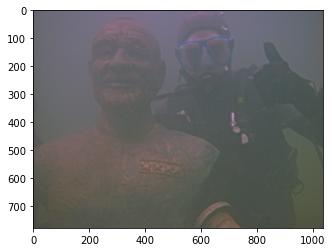

now is iteration 1
53.749447 52.65181 52.861256
53.749447 11.087812662124634 53.75656509399414 0.9895542277792145


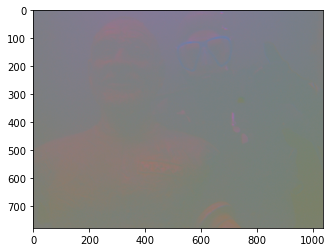

now is iteration 2
53.468708 52.911777 53.116703
53.468708 11.034509539604185 53.46949768066406 0.9948067273326868


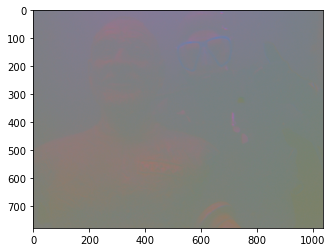

now is iteration 3
53.464737 52.91567 53.120804
53.464737 11.033654570579534 53.46504211425781 0.9948886849761113


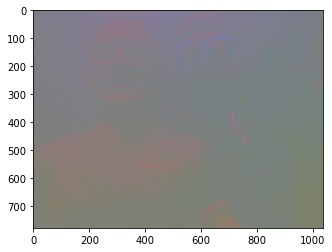

now is iteration 4
53.46467 52.91576 53.120888
53.46467 11.03363621234894 53.4649543762207 0.9948904591598617


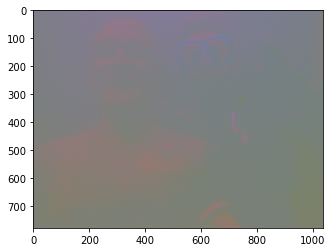

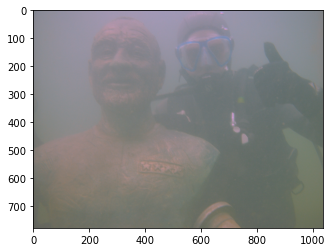

In [172]:
for itr in range(5):
    I0 = np.abs(cv2.filter2D(L[:,:,0], -1, gaussian_kernel_2d))
    I = np.abs(cv2.filter2D(L[:,:,0], -1, gaussian_kernel_2d))
    R = np.zeros(np.shape(I))
    ################################################# calculate shrink part ################################################
    print('now is iteration %d' % (itr))
    diff_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    diff_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

    dx = cv2.filter2D(R,-1,diff_x)
    dy = cv2.filter2D(R,-1,diff_y)

    max_dx = np.abs(dx)-0.5/lamb
    dx = (max_dx>0).astype(float)*max_dx*((dx>=0).astype(float)-(dx<0).astype(float))

    max_dy = np.abs(dy)-0.5/lamb
    dy = (max_dy>0).astype(float)*max_dy*((dy>=0).astype(float)-(dy<0).astype(float))


    ####################################################### calculate R #####################################################
    # one = np.ones(np.shape(L[:,:,0]))
    one = np.zeros(np.shape(L[:,:,0]))
    # one[int(np.shape(one)[0]/2),int(np.shape(one)[1]/2)] = 1
    one[0,0] = 1

    # print(np.min(I))
    if np.min(I)==0:
        I+=1e-20
    # plt.imshow(I,cmap='gray')
    # plt.show()
    R_1 = (1+beta*lamb)*np.fft.fft2(L[:,:,0]/I)
    R_2 = np.fft.fft2(one) + beta*lamb*(np.fft.fft2(dx)*np.conjugate(np.fft.fft2(dx)) + np.fft.fft2(dy)*np.conjugate(np.fft.fft2(dy)))
    # print(np.min(R_2))
    R_ = R_1/R_2
    R = np.real(np.fft.ifft2(R_))
    # R = (R-np.min(R))/(np.max(R)-np.min(R))
    # print(R)
    # plt.imshow(np.abs(R),cmap='gray')
    # plt.show()

    ################################################### calulate I ##########################################################
    one = one*(1+gamma)
    # print(np.min(R))
    if np.min(R)==0:
        R+=1e-20
    I_1 = np.fft.fft2(gamma*I0+L[:,:,0]/R)
    I_2 = np.fft.fft2(one)+alpha*(np.fft.fft2(dx)*np.conjugate(np.fft.fft2(dx))+np.fft.fft2(dy)*np.conjugate(np.fft.fft2(dy)))
    I_ = I_1/I_2
    I = np.real(np.fft.ifft2(I_))
    I = (I>=L[:,:,0]).astype(float)*I+(I<L[:,:,0]).astype(float)*L[:,:,0]
    # I = (I-np.min(I))/(np.max(I)-np.min(I))*230
    # print(I,np.max(I),np.min(I))
    # plt.imshow(I,cmap='gray')
    # plt.show()
    
    ###################################################### remap I ##########################################################
    
    
    ###################################################### output ##########################################################
    L_ = L*1
    L_[:,:,0] = R*I/np.max(R)
    print(np.max(L_[:,:,0]),np.min(L_[:,:,0]),np.mean(L_[:,:,0]))
    print(np.max(L_[:,:,0]),np.max(R),np.max(I),np.min(R)/np.max(R))
    L_ = cv2.cvtColor(L_,cv2.COLOR_LAB2RGB)
    plt.imshow(L_)
    plt.show()
    # L[:,:,0] = (L_[:,:,0]-np.mean(L_[:,:,0]))+np.mean(L[:,:,0])
    L[:,:,0] = R*I/np.max(R)

    

plt.imshow(im_c)
plt.show()

    



# Function

In [173]:
def RETINEX_BASED(im):
    mu = 10
    H,W,garbage = np.shape(im)

    ################################################### Color Correction ########################################################
    im_c = im*1.0
    for i in range(3):
        var = np.sum((im_c[:,:,i]-np.mean(im_c[:,:,i]))**2)/(H*W)
        mu = max(mu,(np.max(im_c[:,:,i])-np.mean(im_c[:,:,i]))/var)
        mu = max(mu,(np.mean(im_c[:,:,i])-np.min(im_c[:,:,i]))/var)

    for i in range(3):
        var = np.sum((im_c[:,:,i]-np.mean(im_c[:,:,i]))**2)/(H*W)
        mx = np.mean(im_c[:,:,i])+mu*var
        mn = np.mean(im_c[:,:,i])-mu*var
        x = (im_c[:,:,i]-mn)/(mx-mn)#*255
        x[x>1] = 1
        x[x<0] = 0
        im_c[:,:,i] = x*1

    im_c = np.float32(im_c)
    im_c_lab = cv2.cvtColor(im_c,cv2.COLOR_RGB2LAB)

    ################################################### Calculate I0 ########################################################
    sigma = 10;
    window_size = 3*sigma    
    gaussian_kernel_1d = signal.gaussian(window_size, std=sigma).reshape(window_size, 1)
    gaussian_kernel_2d = np.outer(gaussian_kernel_1d, gaussian_kernel_1d)
    gaussian_kernel_2d /= np.sum(gaussian_kernel_2d)
    L = im_c_lab*1
    I0 = np.abs(cv2.filter2D(L[:,:,0], -1, gaussian_kernel_2d))

    ################################################### Parameters ########################################################
    lamb = 10
    alpha = 200
    beta = 1
    gamma = 10

    ###################################################### Loop ###########################################################

    #-------------- Initialize ----------------#
    R = np.zeros(np.shape(L[:,:,0]))
    I = I0*1

    #---------------- Shrink ------------------#
    diff_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    diff_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

    dx = cv2.filter2D(R,-1,diff_x)
    dy = cv2.filter2D(R,-1,diff_y)

    max_dx = np.abs(dx)-0.5/lamb
    dx = (max_dx>0).astype(float)*max_dx*((dx>=0).astype(float)-(dx<0).astype(float))

    max_dy = np.abs(dy)-0.5/lamb
    dy = (max_dy>0).astype(float)*max_dy*((dy>=0).astype(float)-(dy<0).astype(float))

    #---------------- R ------------------#
    one = np.zeros(np.shape(L[:,:,0]))
    # one[int(np.shape(one)[0]/2),int(np.shape(one)[1]/2)] = 1
    one[0,0] = 1

    if np.min(I)==0:
        I+=1e-20
    R_1 = (1+beta*lamb)*np.fft.fft2(L[:,:,0]/I)
    R_2 = np.fft.fft2(one) + beta*lamb*(np.fft.fft2(dx)*np.conjugate(np.fft.fft2(dx)) + np.fft.fft2(dy)*np.conjugate(np.fft.fft2(dy)))
    R_ = R_1/R_2
    R = np.real(np.fft.ifft2(R_))

    #---------------- I ------------------#
    one = one*(1+gamma)
    if np.min(R)==0:
        R+=1e-20
    I_1 = np.fft.fft2(gamma*I0+L[:,:,0]/R)
    I_2 = np.fft.fft2(one)+alpha*(np.fft.fft2(dx)*np.conjugate(np.fft.fft2(dx))+np.fft.fft2(dy)*np.conjugate(np.fft.fft2(dy)))
    I_ = I_1/I_2
    I = np.real(np.fft.ifft2(I_))
    I = (I>=L[:,:,0]).astype(float)*I+(I<L[:,:,0]).astype(float)*L[:,:,0]

    #------------- update ----------------#
    L_ = L*1
    L_[:,:,0] = R*I/np.max(R)
    L_ = cv2.cvtColor(L_,cv2.COLOR_LAB2RGB)
    return L_

    #--------------- remap ---------------#


    
    

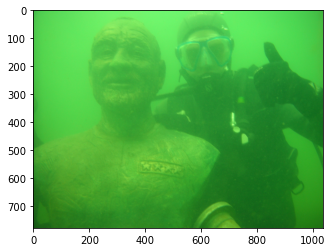

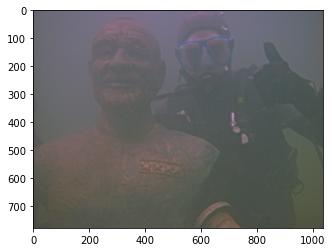

In [174]:
pic_name = '1.png'
im = np.array(cv2.cvtColor(cv2.imread(pic_name), cv2.COLOR_BGR2RGB).astype('double') / 255.0)
plt.imshow(im)
plt.show()
plt.imshow(RETINEX_BASED(im))
plt.show()